In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#path to dataset sentiment "/content/drive/MyDrive/Colab Notebooks/Datasets/dataset_indo/Indonesian Sentiment Twitter Dataset Labeled.csv"
#path to dataset cyberbuly "/content/drive/MyDrive/Colab Notebooks/Datasets/dataset_indo/dataset_komentar_instagram_cyberbullying.csv"

import pandas as pd

train_df= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datasets/dataset_indo/dataset_komentar_instagram_cyberbullying.csv")
train_df

,Id,Label,Text
0,1,0,<USERNAME> TOLOL!! Gak ada hubungan nya kegug...
1,2,0,Geblek lo tata...cowo bgt dibela2in balikan......
2,3,0,Kmrn termewek2 skr lengket lg duhhh kok labil ...
3,4,0,"Intinya kalau kesel dengan ATT nya, gausah ke ..."
4,5,0,"hadewwwww permpuan itu lg!!!!sakit jiwa,knp ha..."
...,...,...,...
395,396,1,Bangga sama suami yg selalu ingat istri disela...
396,397,1,Apaoun pekerjaannya yg penting halal u tuk men...
397,398,1,Gojek itu mayoritas pegangguran yang lama gak ...
398,399,1,<USERNAME> aslinya cantik dan ayu loh mbak kr...


In [ ]:
train_df['Label'].value_counts()

0    200
1    200
Name: Label, dtype: int64

# Data Prepocessing

In [ ]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Id      400 non-null    int64 
 1   Label   400 non-null    int64 
 2   Text    400 non-null    object
dtypes: int64(2), object(1)
memory usage: 9.5+ KB


In [ ]:
def clean_lower(lwr):
    lwr = lwr.lower() # lowercase text
    return lwr
# Buat kolom tambahan untuk data description yang telah dicasefolding
train_df['text_lower'] = train_df['Text'].apply(clean_lower)
casefolding=pd.DataFrame(train_df['text_lower'])
casefolding

,text_lower
0,<username> tolol!! gak ada hubungan nya kegug...
1,geblek lo tata...cowo bgt dibela2in balikan......
2,kmrn termewek2 skr lengket lg duhhh kok labil ...
3,"intinya kalau kesel dengan att nya, gausah ke ..."
4,"hadewwwww permpuan itu lg!!!!sakit jiwa,knp ha..."
...,...
395,bangga sama suami yg selalu ingat istri disela...
396,apaoun pekerjaannya yg penting halal u tuk men...
397,gojek itu mayoritas pegangguran yang lama gak ...
398,<username> aslinya cantik dan ayu loh mbak kr...


In [ ]:
#Remove Puncutuation
clean_spcl = re.compile('[/(){}\[\]\|@,;]')
clean_symbol = re.compile('[^0-9a-z]')
def clean_punct(text):
    text = clean_spcl.sub('', text)
    text = clean_symbol.sub(' ', text)
    return text
# Buat kolom tambahan untuk data description yang telah diremovepunctuation
train_df['text_lower'] = train_df['text_lower'].apply(clean_punct)
train_df['text_lower']

0        username  tolol   gak ada hubungan nya kegug...
1      geblek lo tata   cowo bgt dibela2in balikan   ...
2      kmrn termewek2 skr lengket lg duhhh kok labil ...
3      intinya kalau kesel dengan att nya gausah ke a...
4      hadewwwww permpuan itu lg    sakit jiwaknp har...
                             ...                        
395    bangga sama suami yg selalu ingat istri disela...
396    apaoun pekerjaannya yg penting halal u tuk men...
397    gojek itu mayoritas pegangguran yang lama gak ...
398      username  aslinya cantik dan ayu loh mbak kr...
399      username  suami saya seumuran sama saya mba ...
Name: text_lower, Length: 400, dtype: object

In [ ]:
def _normalize_whitespace(text):
    corrected = str(text)
    corrected = re.sub(r"//t",r"\t", corrected)
    corrected = re.sub(r"( )\1+",r"\1", corrected)
    corrected = re.sub(r"(\n)\1+",r"\1", corrected)
    corrected = re.sub(r"(\r)\1+",r"\1", corrected)
    corrected = re.sub(r"(\t)\1+",r"\1", corrected)
    return corrected.strip(" ")
train_df['text_lower'] = train_df['text_lower'].apply(_normalize_whitespace)
train_df['text_lower']

0      username tolol gak ada hubungan nya keguguran ...
1      geblek lo tata cowo bgt dibela2in balikan hade...
2      kmrn termewek2 skr lengket lg duhhh kok labil ...
3      intinya kalau kesel dengan att nya gausah ke a...
4      hadewwwww permpuan itu lg sakit jiwaknp harus ...
                             ...                        
395    bangga sama suami yg selalu ingat istri disela...
396    apaoun pekerjaannya yg penting halal u tuk men...
397    gojek itu mayoritas pegangguran yang lama gak ...
398    username aslinya cantik dan ayu loh mbak krn a...
399    username suami saya seumuran sama saya mba mal...
Name: text_lower, Length: 400, dtype: object

In [ ]:
!pip install sastrawi

In [ ]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

stop_factory = StopWordRemoverFactory()
more_stopword = ['dengan', 'ia','bahwa','oleh','yg', 'lg', 'jd']
data = stop_factory.get_stop_words()+ more_stopword
stopword = stop_factory.create_stop_word_remover()
print(data)


['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'tidak', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin', 'juga', 'nggak', 'mari', 'nanti', 'melainkan', '

In [ ]:
#clean stopwords
stopword = data
def clean_stopwords(text):
    text = ' '.join(word for word in text.split() if word not in stopword) # hapus stopword dari kolom deskripsi
    return text
# Buat kolom tambahan untuk data description yang telah distopwordsremoval
train_df['text_lower'] = train_df['text_lower'].apply(clean_stopwords)

train_df['text_lower']

0      username tolol gak hubungan nya keguguran dgn ...
1      geblek lo tata cowo bgt dibela2in balikan hade...
2      kmrn termewek2 skr lengket duhhh kok labil bgt...
3      intinya kalau kesel att nya gausah anaknya kas...
4      hadewwwww permpuan sakit jiwaknp peran utama f...
                             ...                        
395    bangga sama suami selalu ingat istri disela wa...
396    apaoun pekerjaannya penting halal u tuk menafk...
397    gojek mayoritas pegangguran lama gak kerja tru...
398    username aslinya cantik ayu loh mbak krn aku b...
399    username suami seumuran sama mba malah tuaan b...
Name: text_lower, Length: 400, dtype: object

In [ ]:
#stemming

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def sastrawistemmer(text):
  text = ' '.join(stemmer.stem(word) for word in text.split() if word in text)
  return text
# Buat kolom tambahan untuk data description yang telah dilemmatization
train_df['text_clean'] = train_df['text_lower'].apply(sastrawistemmer)
train_df['text_clean']

0      username tolol gak hubung nya gugur dgn pake h...
1      geblek lo tata cowo bgt dibela2in balik hadeww...
2      kmrn termewek2 skr lengket duhhh kok labil bgt...
3      inti kalau kesel att nya gausah anak kasi buat...
4      hadewwwww permpuan sakit jiwaknp peran utama f...
                             ...                        
395    bangga sama suami selalu ingat istri sela wakt...
396    apaoun kerja penting halal u tuk nafkah keluar...
397    gojek mayoritas pegangguran lama gak kerja tru...
398    username asli cantik ayu loh mbak krn aku temu...
399    username suami umur sama mba malah tua beberap...
Name: text_clean, Length: 400, dtype: object

Combine new colum to old dataset

In [ ]:
train_df = pd.merge(train_df, train_df['text_clean'])
train_df

,Id,Label,Text,text_lower,text_clean
0,1,0,<USERNAME> TOLOL!! Gak ada hubungan nya kegug...,username tolol gak hubungan nya keguguran dgn ...,username tolol gak hubung nya gugur dgn pake h...
1,2,0,Geblek lo tata...cowo bgt dibela2in balikan......,geblek lo tata cowo bgt dibela2in balikan hade...,geblek lo tata cowo bgt dibela2in balik hadeww...
2,3,0,Kmrn termewek2 skr lengket lg duhhh kok labil ...,kmrn termewek2 skr lengket duhhh kok labil bgt...,kmrn termewek2 skr lengket duhhh kok labil bgt...
3,4,0,"Intinya kalau kesel dengan ATT nya, gausah ke ...",intinya kalau kesel att nya gausah anaknya kas...,inti kalau kesel att nya gausah anak kasi buat...
4,5,0,"hadewwwww permpuan itu lg!!!!sakit jiwa,knp ha...",hadewwwww permpuan sakit jiwaknp peran utama f...,hadewwwww permpuan sakit jiwaknp peran utama f...
...,...,...,...,...,...
401,396,1,Bangga sama suami yg selalu ingat istri disela...,bangga sama suami selalu ingat istri disela wa...,bangga sama suami selalu ingat istri sela wakt...
402,397,1,Apaoun pekerjaannya yg penting halal u tuk men...,apaoun pekerjaannya penting halal u tuk menafk...,apaoun kerja penting halal u tuk nafkah keluar...
403,398,1,Gojek itu mayoritas pegangguran yang lama gak ...,gojek mayoritas pegangguran lama gak kerja tru...,gojek mayoritas pegangguran lama gak kerja tru...
404,399,1,<USERNAME> aslinya cantik dan ayu loh mbak kr...,username aslinya cantik ayu loh mbak krn aku b...,username asli cantik ayu loh mbak krn aku temu...


!pip install gensim fasttext

In [ ]:
#from gensim.models.fasttext import FastText
#model = FastText.load_fasttext_format('/content/drive/MyDrive/Colab Notebooks/Embeeding/Fasttext/cc.id.300.bin')


In [ ]:
import numpy as np

path = "/content/drive/MyDrive/Colab Notebooks/Embeeding/Glove_id/glove_50dim_wiki.id.case.text.txt"
words = dict()

def add_to_dict(d, filename):
    with open(filename, 'r', encoding='utf-8') as f:
        for line in f.readlines():
            parts = line.strip().split(' ')
            word = parts[0]
            vector = np.array(parts[1:], dtype=np.float32)
            d[word] = vector



In [ ]:
add_to_dict(words, path)
words

{'dan': array([ 4.311100e-02, -4.155590e-01,  9.012980e-01, -5.715630e-01,
        -9.509630e-01,  1.067452e+00,  3.244720e-01,  3.752720e-01,
        -3.468150e-01,  1.402672e+00, -1.966780e-01,  5.044850e-01,
        -6.571500e-02,  8.980000e-02,  2.727630e-01, -1.859936e+00,
        -1.315410e-01,  1.348760e-01,  2.405089e+00, -3.236080e-01,
        -3.391510e-01,  6.474580e-01,  1.050383e+00,  5.953240e-01,
        -7.299580e-01,  2.109786e+00, -1.084744e+00, -2.281900e-01,
         5.437870e-01,  1.107184e+00,  1.259983e+00,  1.229289e+00,
         1.823220e-01, -4.230050e-01, -5.431880e-01, -6.363160e-01,
         2.784970e-01, -1.186320e+00, -1.613518e+00, -4.228430e-01,
         4.417100e-01, -8.703300e-01, -1.060916e+00,  1.630310e-01,
         6.397790e-01,  2.213070e-01, -9.384930e-01,  1.462255e+00,
         2.830160e+00,  1.904000e-03], dtype=float32),
 'yang': array([ 0.394551, -0.99575 ,  0.757868, -0.909385, -0.155638,  0.714083,
        -0.030915,  0.526547, -0.832625,

In [ ]:
len(words)

370013

In [ ]:
import nltk

nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
tokenizer = nltk.RegexpTokenizer(r"\w+")
tokenizer.tokenize("<username> tolol!! gak ada hubungan nya keguguran dgn pake hijab ")

['username',
 'tolol',
 'gak',
 'ada',
 'hubungan',
 'nya',
 'keguguran',
 'dgn',
 'pake',
 'hijab']

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def message_to_token_list(s):
    tokens = word_tokenize(s)
    lowercased_tokens = [t.lower() for t in tokens]
    lemmatized_tokens = [lemmatizer.lemmatize(t) for t in lowercased_tokens]
    useful_tokens = [t for t in lemmatized_tokens if t in words]

    return useful_tokens

tokens = message_to_token_list("tolol!! gak ada hubungan nya keguguran dgn pake hijab")
print(tokens)

['tolol', 'gak', 'ada', 'hubungan', 'nya', 'keguguran', 'dgn', 'pake', 'hijab']


In [ ]:
def message_to_word_vectors(message,word_dict=words):
  processed_list_of_tokens = message_to_token_list(message)

  vectors = []

  for token in processed_list_of_tokens:
    if token not in word_dict:
      continue

    token_vector =word_dict[token]
    vectors.append(token_vector)

  return np.array(vectors, dtype=float)


In [ ]:
message_to_word_vectors('tolol!! gak ada hubungan nya keguguran dgn pake hijab')

array([[ 2.22059995e-01, -4.37622011e-01, -3.91849987e-02,
         8.09542000e-01, -3.83854985e-01, -5.97801983e-01,
         2.42694005e-01,  1.87282994e-01, -7.35575974e-01,
         4.56652999e-01, -1.98780000e-01,  4.38068986e-01,
        -1.63136005e-01, -6.41321003e-01, -1.19686000e-01,
        -1.27091005e-01,  3.59180987e-01, -4.00258988e-01,
        -1.31650901e+00,  5.58314979e-01,  1.82824999e-01,
        -1.43623993e-01,  5.81694007e-01, -3.48197013e-01,
         3.50553006e-01, -9.42789987e-02,  1.67155996e-01,
        -7.61225998e-01,  1.03855997e-01,  1.17216997e-01,
        -3.51657987e-01, -5.55902004e-01, -3.81089985e-01,
        -6.89266980e-01,  9.05425012e-01, -6.22035980e-01,
         9.32310000e-02,  5.70465028e-01,  6.28199987e-03,
         1.29008994e-01,  2.48373002e-01,  2.28260994e-01,
        -2.05392003e-01, -1.96235001e-01,  8.16140026e-02,
         7.33802974e-01, -5.23021996e-01,  7.31870010e-02,
         2.17509996e-02, -6.89881980e-01],
       [ 6.06

In [ ]:
message_to_word_vectors('tolol!! gak ada hubungan nya keguguran dgn pake hijab').shape

(9, 50)

In [ ]:
train_df = train_df.sample(frac=1,random_state=1)
train_df.reset_index(drop=True,inplace=True)

split_index_1 = int(len(train_df) * 0.7)
split_index_2 = int(len(train_df) * 0.85)

train_df, val_df, test_df = train_df[:split_index_1], train_df[split_index_1:split_index_2], train_df[split_index_2:]

len(train_df), len(val_df), len(test_df)

(284, 61, 61)

In [ ]:
train_df.info()
val_df.info()
test_df.info()

In [ ]:
def df_to_X_y(dff):
    y = dff['Label'].to_numpy().astype(int)
    all_word_vector_sequences = []

    for message in dff['text_clean']:
        message_as_vector_seq = message_to_word_vectors(message)

        if message_as_vector_seq.shape[0] == 0:
            message_as_vector_seq = np.zeros(shape=(1, 50))

        all_word_vector_sequences.append(message_as_vector_seq)

    return all_word_vector_sequences, y


In [ ]:
X_train, y_train = df_to_X_y(train_df)
print(len(X_train), len(X_train[0]))
print(len(X_train), len(X_train[1]))

284 15
284 6


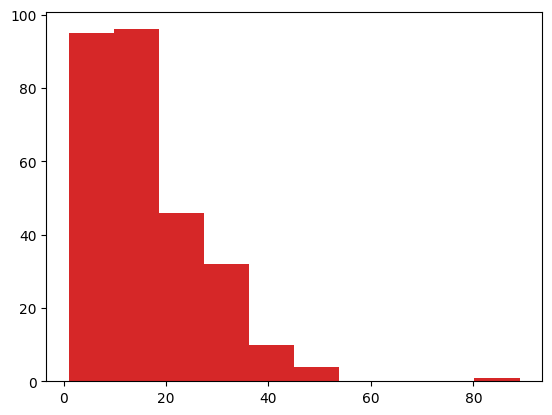

In [ ]:
sequence_lengths = []
for i in range(len(X_train)):
  sequence_lengths.append(len(X_train[i]))

  import matplotlib.pyplot as plt

  plt.hist(sequence_lengths)


In [ ]:
pd.Series(sequence_lengths).describe()

count    284.000000
mean      15.992958
std       11.185235
min        1.000000
25%        8.000000
50%       13.000000
75%       21.000000
max       89.000000
dtype: float64

membuat zero padding untuk mengisi vector menjadi vector kosong sampe nilai maksimal

In [ ]:
from copy import deepcopy

def pad_X(X, desired_sequence_length=91):
    X_copy = deepcopy(X)

    for i, x in enumerate(X):
        x_seq_len = x.shape[0]
        sequence_length_difference = desired_sequence_length - x_seq_len

        pad = np.zeros(shape=(sequence_length_difference, 50))  # 50 adalah dimensi vector Glove

        X_copy[i] = np.concatenate([x, pad])

    return np.array(X_copy).astype(float)


In [ ]:
#kita coba apakah dimensi berubah

# Assuming X_train is a list of arrays
X_train = pad_X(X_train)

X_train.shape

(284, 91, 50)

In [ ]:
y_train.shape


(284,)

In [ ]:
X_val, y_val = df_to_X_y(val_df)
X_val = pad_X(X_val)

X_val.shape, y_val.shape

((61, 91, 50), (61,))

In [ ]:
X_test, y_test = df_to_X_y(test_df)
X_test = pad_X(X_test)

X_test.shape, y_test.shape

((61, 91, 50), (61,))

LSTM based Model using tensorflow

In [ ]:
!pip install tensorflow

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

model = Sequential([])

model.add(layers.Input(shape=(91,50)))
model.add(layers.LSTM(64, return_sequences=True))
model.add(layers.Dropout(0.2))
model.add(layers.LSTM(64, return_sequences=True))
model.add(layers.Dropout(0.2))
model.add(layers.LSTM(64, return_sequences=True))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(1, activation='sigmoid'))


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 91, 64)            29440     
                                                                 
 dropout_6 (Dropout)         (None, 91, 64)            0         
                                                                 
 lstm_7 (LSTM)               (None, 91, 64)            33024     
                                                                 
 dropout_7 (Dropout)         (None, 91, 64)            0         
                                                                 
 lstm_8 (LSTM)               (None, 91, 64)            33024     
                                                                 
 dropout_8 (Dropout)         (None, 91, 64)            0         
                                                                 
 flatten (Flatten)           (None, 5824)             

In [ ]:
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC, Accuracy
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint_path = '/content/drive/MyDrive/Colab Notebooks/Datasets/dataset_indo/LSTM_model/'
cp = ModelCheckpoint(checkpoint_path, save_best_only=True, monitor='val_loss', mode='min')

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss=BinaryCrossentropy(),
              metrics=['accuracy', AUC(name='auc')])


In [ ]:
frequencies = pd.value_counts(train_df['Label'])
frequencies

0    143
1    141
Name: Label, dtype: int64

Jika class imbalance, maka harus tentukan weight

rumusnya
weights ={0: frequencies.sum()/frequencies[0], 1: frequencies.sum()/frequencies[1]}
weights

kemudian tambahkan diatribut learning
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, callbacks=[cp], **class_weight=weights**)

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=25, callbacks=[cp])

Epoch 1/25
9/9 [==============================] - 18s 2s/step - loss: 0.4110 - accuracy: 0.8239 - auc: 0.8942 - val_loss: 0.5553 - val_accuracy: 0.7541 - val_auc: 0.8041
Epoch 2/25
9/9 [==============================] - 10s 1s/step - loss: 0.3901 - accuracy: 0.8204 - auc: 0.9073 - val_loss: 0.5313 - val_accuracy: 0.7377 - val_auc: 0.8258
Epoch 3/25
9/9 [==============================] - 0s 38ms/step - loss: 0.3938 - accuracy: 0.8345 - auc: 0.9046 - val_loss: 0.5398 - val_accuracy: 0.7213 - val_auc: 0.8122
Epoch 4/25
9/9 [==============================] - 11s 1s/step - loss: 0.3865 - accuracy: 0.8521 - auc: 0.9082 - val_loss: 0.5285 - val_accuracy: 0.7049 - val_auc: 0.8220
Epoch 5/25
9/9 [==============================] - 0s 27ms/step - loss: 0.3772 - accuracy: 0.8486 - auc: 0.9125 - val_loss: 0.5363 - val_accuracy: 0.7213 - val_auc: 0.8144
Epoch 6/25
9/9 [==============================] - 0s 21ms/step - loss: 0.3807 - accuracy: 0.8486 - auc: 0.9113 - val_loss: 0.5312 - val_accuracy: 0.

Uji Model dengan Best Model

Load Model dari training

In [ ]:
from tensorflow.keras.models import load_model
best_model = load_model(checkpoint_path)


In [ ]:
test_prediction = (best_model.predict(X_test)>0.5).astype(int)

#tampilkan hasil test
from sklearn.metrics import classification_report

print(classification_report(y_test, test_prediction))

2/2 [==============================] - 1s 12ms/step
              precision    recall  f1-score   support

           0       0.71      0.73      0.72        30
           1       0.73      0.71      0.72        31

    accuracy                           0.72        61
   macro avg       0.72      0.72      0.72        61
weighted avg       0.72      0.72      0.72        61



In [ ]:
def pad_test(X, desired_sequence_length=91):
    X_copy = deepcopy(X)

    x_seq_len = X_copy.shape[0]
    sequence_length_difference = desired_sequence_length - x_seq_len

    pad = np.zeros(shape=(sequence_length_difference, 50))  # 50 adalah dimensi vector Glove

    return np.concatenate([X_copy, pad], axis=0).reshape(1, desired_sequence_length, 50).astype(float)

In [ ]:
def prediction(input_text):
    input_vec = message_to_word_vectors(input_text)
    padded_input_sequence = pad_test(input_vec)

    # Make predictions
    predictions = model.predict(padded_input_sequence)

    # The 'predictions' variable now contains the model's output for your input
    threshold = 0.5
    binary_prediction = 1 if predictions[0, 0] > threshold else 0
    print("Predictions:", predictions)
    print("Binary Prediction:", binary_prediction)

    if binary_prediction == 1:
        print("Predicted: Positive")
    else:
        print("Predicted: Negative")

In [ ]:
input_text = "Dasar Bego dan Bodoh"
prediction(input_text)

1/1 [==============================] - 0s 70ms/step
Predictions: [[0.20007531]]
Binary Prediction: 0
Predicted: Negative


In [ ]:
input_text = "Semangat dan kebahagiaan selalu menyertai langkah kita setiap hari."
prediction(input_text)

1/1 [==============================] - 0s 41ms/step
Predictions: [[0.9974063]]
Binary Prediction: 1
Predicted: Positive
